<a href="https://colab.research.google.com/github/Nada-Naveesh/Deep_Learning/blob/main/2fnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#importing the required libraries
#TensorFlow is an open-source library developed by Google that is widely used for deep learning and machine learning.
#It helps you build, train, and deploy neural networks efficiently.

#Keras is a high-level deep learning API that runs on top of TensorFlow.
#Think of it as a user-friendly interface for TensorFlow.

#TensorFlow = powerful engine
#Keras = easy control panel

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [22]:
#load the dataset and perform padding
#pad_sequences is a preprocessing function in Keras
#it is used to make all input sequences the same length by adding padding values (usually zeros) to shorter sequences and truncating longer sequences,
#so that the data can be efficiently processed by neural network models.

num_words = 10000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=num_words)
maxlen=200
x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)

In [23]:
#model the network

modl=keras.Sequential([
    layers.Embedding(num_words,32,input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
#define the metrics

modl.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
#train and evluate the model

history=modl.fit(x_train,y_train,epochs=10,batch_size=120,validation_split=0.2)
test_loss,test_acc=modl.evaluate(x_test,y_test)
print(f"Test Accuracy={test_acc:4f}")
print(f"Test loss{test_loss:4f}")

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5942 - loss: 0.6755 - val_accuracy: 0.8194 - val_loss: 0.5341
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8268 - loss: 0.4779 - val_accuracy: 0.8578 - val_loss: 0.3642
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8823 - loss: 0.3218 - val_accuracy: 0.8726 - val_loss: 0.3148
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9017 - loss: 0.2591 - val_accuracy: 0.8812 - val_loss: 0.2976
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9150 - loss: 0.2267 - val_accuracy: 0.8812 - val_loss: 0.2940
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9260 - loss: 0.2018 - val_accuracy: 0.8828 - val_loss: 0.2924
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9297 - loss: 0.1880 - val_accuracy: 0.8852 - val_loss: 0.2918
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9406 - loss: 0.1642 - val_accu

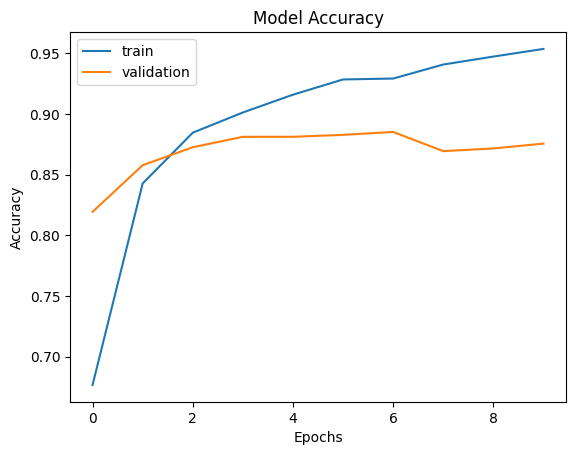

In [26]:
#plotting the graph

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.savefig('Model Accuracy.tiff')
plt.show()